In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import netCDF4 as netCDF
from IPython.display import Image
from scipy.fftpack import fft, ifft
from scipy import stats
from scipy.stats import norm

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# from mpl_toolkits.basemap import Basemap

In [2]:
import tabs

In [8]:
# meta = tabs.meta('42035')
# meta
# df = tabs.read('42035', '2010-07-01', '2010-07-30')
# df
uw = df['42035: East [m/s] (air)']
vw = df['42035: North [m/s] (air)']

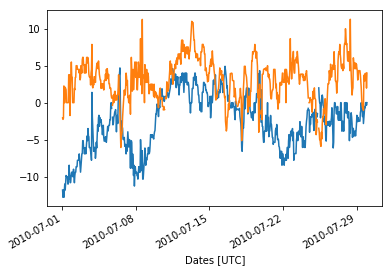

In [13]:
df = tabs.read('42035', '2010-07-01', '2010-07-30')
uw = df['42035: East [m/s] (air)']
vw = df['42035: North [m/s] (air)']
uw.plot()
vw.plot()

# 1. Location of TABS B

In [5]:
def background(p, extent, ds, 
               pars=np.arange(18, 35), mers=np.arange(-100, -80), 
               hlevs=np.hstack(([10,20],np.arange(50,500,50))), 
               col='lightgrey', outline=[1, 1, 0, 1], ax=None, fig=None):
    """
    Plot basic TXLA shelf background: coastline, bathymetry, meridians, etc
    pars    parallels to plot
    mers    meridians to plot
    hlevs   which depth contours to plot
    outline     west, east, north, south lines (left, right, top, bottom)
    """
    
    if fig is None:
        fig = plt.gcf()

    if ax is None:
        ax = plt.gca(projection=p)
                           
    ax.set_extent(extent)
    ax.add_feature(cfeature.NaturalEarthFeature( category='physical', name='land', 
                                                scale='10m', 
                                                facecolor='slategrey'))
    ax.add_feature(cfeature.NaturalEarthFeature( category='physical', name='rivers_lake_centerlines', 
                                                scale='10m', 
                                                edgecolor='blue', facecolor='none'))
    ax.add_feature(cfeature.NaturalEarthFeature( category='cultural', name='admin_1_states_provinces_lines', 
                                                scale='10m', 
                                                facecolor='none'))
    ax.coastlines(resolution="10m")   
        
    ax.contour(ds.lon_rho,ds.lat_rho, ds.h, hlevs, colors=col, linewidths=0.5, transform=ccrs.PlateCarree())
    
    
    # Outline numerical domain
    # if outline:  # backward compatibility
    #     outline = [1,1,1,1]
    if outline[3]:
        ax.plot(ds.lon_rho[0,:], ds.lat_rho[0,:], 'k:', transform=ccrs.PlateCarree())
    if outline[2]:
        ax.plot(ds.lon_rho[-1,:], ds.lat_rho[-1,:], 'k:', transform=ccrs.PlateCarree())
    if outline[1]:
        ax.plot(ds.lon_rho[:,-1], ds.lat_rho[:,-1], 'k:', transform=ccrs.PlateCarree())
    if outline[0]:
        ax.plot(ds.lon_rho[:,0], ds.lat_rho[:,0],'k:', transform=ccrs.PlateCarree())
        
    gl = ax.gridlines(xlocs= mers, ylocs=pars, draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    ax.outline_patch.set_visible(False)
     
    return fig, ax

In [6]:
# def background(lon_r,lat_r,h,basemap, ax=None, pars=np.arange(18, 35), mers=np.arange(-100, -80, 2), 
#                 hlevs=np.hstack(([10,20],np.arange(50,200,50))), 
#                 col='lightgrey', fig=None, outline=[1, 1, 0, 1], merslabels=[0, 0, 1, 0],
#                 parslabels=[1, 0, 0, 0]):
#     """
#     Plot basic TXLA shelf background: coastline, bathymetry, meridians, etc
#     Can optionally input grid (so it doesn't have to be loaded again)

#     pars    parallels to plot
#     mers    meridians to plot
#     hlevs   which depth contours to plot
#     outline     west, east, north, south lines (left, right, top, bottom)
#     """
    
#     xr,yr = basemap(lon_r,lat_r)

#     if fig is None:
#         fig = gcf()

#     if ax is None:
#         ax = gca()

#     # Do plot   
#     basemap.drawcoastlines(ax=ax)
#     basemap.fillcontinents('0.8',ax=ax)
#     basemap.drawparallels(pars, dashes=(1, 1), 
#                             linewidth=0., labels=parslabels, ax=ax,fontsize=6)
#     basemap.drawmeridians(mers, dashes=(1, 1), 
#                             linewidth=0., labels=merslabels, ax=ax,fontsize=6)
#     # hold('on')
#     ax.contour(xr,yr,h, hlevs, colors=col, linewidths=0.5)

#     # Outline numerical domain
#     # if outline:  # backward compatibility
#     #     outline = [1,1,1,1]
# #     if outline[3]:
# #         ax.plot(xr[0,:], yr[0,:], 'k:')
# #     if outline[2]:
# #         ax.plot(xr[-1,:], yr[-1,:], 'k:')
# #     if outline[1]:
# #         ax.plot(xr[:,-1], yr[:,-1], 'k:')
# #     if outline[0]:
# #         ax.plot(xr[:,0], yr[:,0],'k:')

In [7]:
# grid_filename = 'http://barataria.tamu.edu:8080/thredds/dodsC/txla_nesting6_grid/txla_grd_v4_new.nc'
# nc = netCDF.Dataset(grid_filename)
# h = nc.variables['h'][:]
# lon_rho = nc.variables['lon_rho'][:]
# lat_rho = nc.variables['lat_rho'][:]

# llcrnrlat=26
# llcrnrlon=-98
# urcrnrlat=31
# urcrnrlon=-88
# lat_0 = (llcrnrlat+urcrnrlat)*0.5
# lon_0 = (llcrnrlon+urcrnrlon)*0.5
# res='i'
# projection='lcc'
# m = Basemap(llcrnrlon=llcrnrlon,
#                          llcrnrlat=llcrnrlat,
#                          urcrnrlon=urcrnrlon,
#                          urcrnrlat=urcrnrlat,
#                          projection=projection,
#                          lat_0=lat_0,
#                          lon_0=lon_0,
#                          resolution=res)

In [8]:
grid_filename = 'http://barataria.tamu.edu:8080/thredds/dodsC/txla_nesting6_grid/txla_grd_v4_new.nc'
ds = xr.open_dataset(grid_filename)

# Grid setting
llcrnrlat=26
llcrnrlon=-98
urcrnrlat=31
urcrnrlon=-88
# lat_0 = (llcrnrlat+urcrnrlat)*0.5
lon_0 = (llcrnrlon+urcrnrlon)*0.5
extent=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]
p = ccrs.PlateCarree(central_longitude=lon_0)

In [87]:
loc.shape

(5, 2)

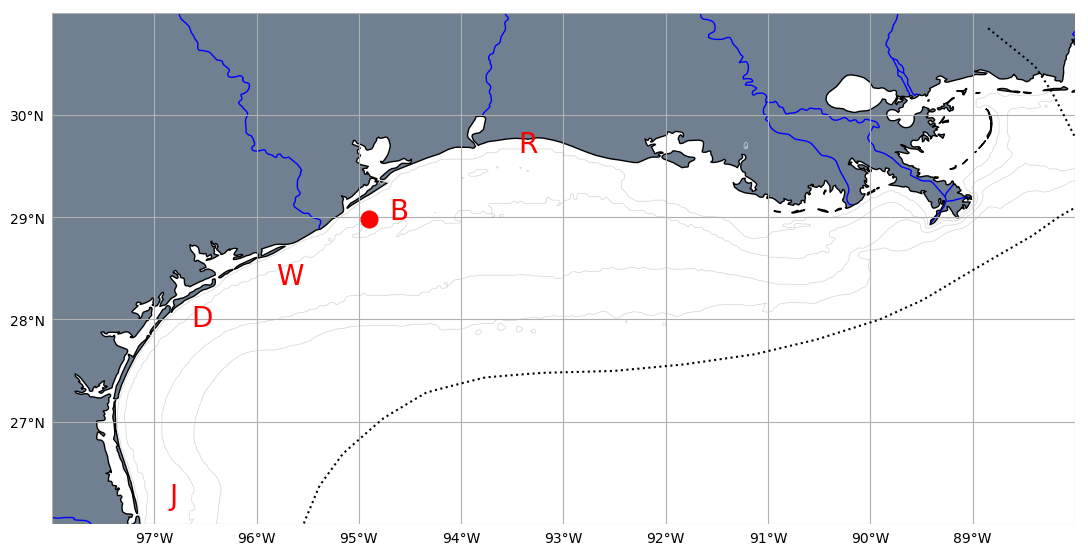

In [88]:
Buoy_R = [29+38.100/60., -93-38.502/60.]
Buoy_B = [28+58.939/60., -94-53.944/60.]
Buoy_W = [28+21.042/60., -96-0.3480/60.]
Buoy_D = [27+56.376/60., -96-50.574/60.]
Buoy_J = [26+11.484/60., -97-3.0420/60.]

# order : R B W D J
loc = np.vstack((Buoy_R,Buoy_B,Buoy_W,Buoy_D,Buoy_J))
# loc_lon, loc_lat = m(loc[:,1],loc[:,0])

fig = plt.figure(figsize=(11, 9), dpi=100)
ax = fig.add_axes([0.05, 0.03, 0.93, 0.94], projection=p)
background(p, extent, ds, mers=np.arange(-98, -87), pars=np.arange(23, 32),hlevs=[10,20,50,100],
           col='lightgrey', outline=[1, 1, 0, 1], ax=ax, fig=fig)
#             
# background(lon_rho,lat_rho,h,m, fig=fig, ax=ax, mers=np.arange(-97, -87), pars=np.arange(23, 32),hlevs=[10,20,50,100])
# ax.plot(loc_lon[1], loc_lat[1],'ro',markersize=12)
ax.plot(loc[1,1], loc[1,0],'ro',markersize=12, transform=ccrs.PlateCarree())

list = ['R','B','W','D','J']
for i in range(5):
    ax.text(loc[i,1]+.2, loc[i,0],list[i],fontsize=20,color='r', transform=ccrs.PlateCarree())
plt.show()

# 2. Read and plot the wind data

In [82]:
class Buoy(object):
    "Read the wind data"
    
    def __init__(self, filename):        
        self.filename = filename
        self.time = []
        self.uwind = []
        self.vwind = []      
        file = open(self.filename)
        for line in file:
            line_sp = line.split()
            [month, day, year] = line_sp[0].split('/')
            [hour, minute, second] = line_sp[1].split(':')
            ti = dt.datetime(int(year),int(month),int(day),int(hour),int(minute),int(second))
            self.time.append(ti)
            self.uwind.append(float(line_sp[2]))
            self.vwind.append(float(line_sp[3]))
            
        self.uwind = np.asarray(self.uwind)
        self.vwind = np.asarray(self.vwind)
        self.time  = np.asarray(self.time)
        
    def plot_uv(self,fig,skip=1):
        'plot with skip'
        ax1 = fig.add_subplot(211)
        ax2 = fig.add_subplot(212, sharex=ax1)
        ax1.plot(self.time[::skip],self.uwind[::skip],'b')
        ax2.plot(self.time[::skip],self.vwind[::skip],'g')
        ax1.set_title('a) U Wind')
        ax1.set_ylabel('m/s')
        ax1.set_ylim(-15,15)
#         ax1.axes.get_xaxis().set_visible(False)
        ax1.grid(True)
        ax2.set_title('b) V Wind')
        ax2.set_ylabel('m/s')
        ax2.set_ylim(-15,15)
        ax2.grid(True)

        print("mean wind:", np.mean(np.abs(self.uwind)))
        
    def fft_wind(self,skip=1):
        dt = float((self.time[1]-self.time[0]).seconds * skip)
        N = len(self.time[::skip])
        T = N*dt
        df = 1./T
        #detrend
        ut = self.uwind[::skip] - np.mean(self.uwind[::skip])
        vt = self.vwind[::skip] - np.mean(self.vwind[::skip])
        fn_u = fft(ut)/T*dt
        fn_v = fft(vt)/T*dt
        sf_u = np.absolute(fn_u)**2
        sf_v = np.absolute(fn_v)**2
        freq = np.asarray([ii*df for ii in range(N)])
        return (fn_u, fn_v, sf_u, sf_v, freq, T, dt, df)

mean wind: 2.00647177419


(-1.0385957327138561e-16+0j)

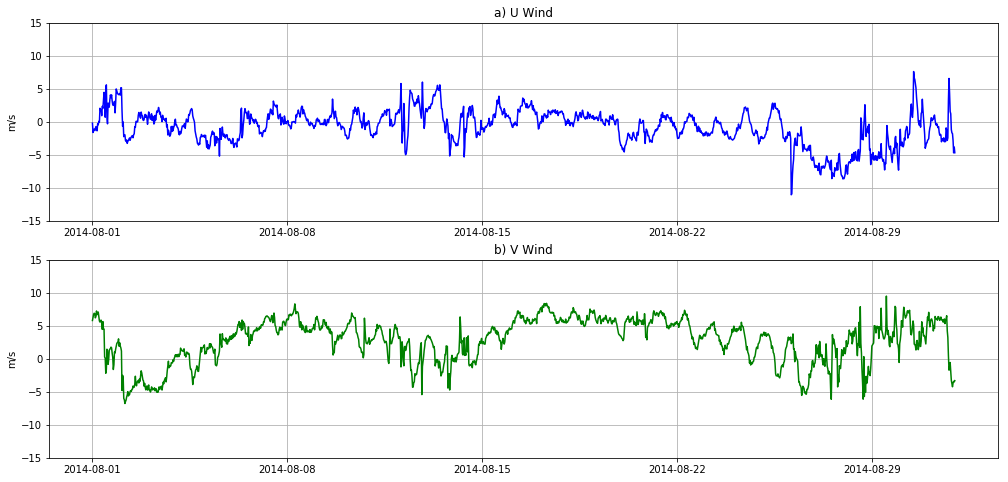

In [83]:
# half-hour data
tabs_b = Buoy('./TABS_B_AUG.txt')
fig = plt.figure(figsize=(17,8))
tabs_b.plot_uv(fig)

fn_u_raw, fn_v_raw, sf_u_raw, sf_v_raw, freq_raw,  T_raw, dt_raw, df_raw= tabs_b.fft_wind(skip=1)
fn_u_raw[0]

# 3. FFT result

length of fn is 1488
length of data 1488
r2 -> 0.854937688872
t-test -> Ttest_indResult(statistic=-0.70263229562051743, pvalue=0.48239512915056926)


/Users/vrx/miniconda3/envs/owl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/vrx/miniconda3/envs/owl/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/vrx/miniconda3/envs/owl/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


FileNotFoundError: [Errno 2] No such file or directory: './wind_recons.npy'

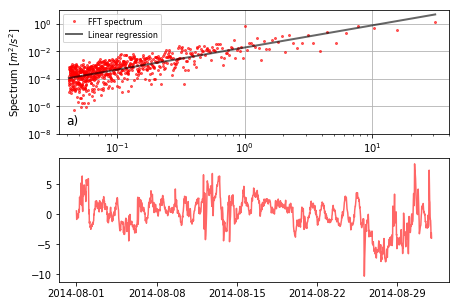

In [85]:
# Raw spectrum
fn_u_raw, fn_v_raw, sf_u_raw, sf_v_raw, freq_raw,  T_raw, dt_raw, df_raw= tabs_b.fft_wind(skip=1)
print ('length of fn is', len(fn_u_raw))
print ('length of data', len(tabs_b.uwind[:]))

trunc_raw = int(len(freq_raw)/2)
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(211)
ax1.plot(1./(freq_raw[:trunc_raw]*86400),2*sf_u_raw[:trunc_raw], 'r.',\
         markersize=4, alpha=0.6,label='FFT spectrum')

# Linear regression
slope, intercept, r_value, p_value, std_err = \
stats.linregress(np.log10(1./(freq_raw[1:trunc_raw]*86400)),np.log10(sf_u_raw[1:trunc_raw]))

# print ('r_value ->', r_value**2)
# print ('p_value ->', p_value)
# print ('std_err ->', std_err)

x_std = 1./(freq_raw[1:trunc_raw]*86400)
y_std_linear = 10**(slope*np.log10(x_std) + intercept)

print ('r2 ->', np.corrcoef(sf_u_raw[1:trunc_raw], y_std_linear)[0,1])

print ('t-test ->', stats.ttest_ind(sf_u_raw[1:trunc_raw], y_std_linear))

ax1.plot(x_std,y_std_linear*2,'k',alpha=0.6,label='Linear regression',lw=2)
# ax1.plot(x_std,y_std_flat,'r',label='Flat spectrum',lw=2)
# ax1.plot(x_std,y_std_medium,'g',label='Medium spectrum',lw=2)

ax1.set_ylabel('Spectrum [$m^2/s^2$]')
ax1.legend(numpoints=1,loc=2,fontsize=8)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([1.e-8, 10])
ax1.set_xlim([3000/86400., 40])
ax1.set_yticks([1.e-8,1.e-6,1.e-4,1.e-2,1.e0])
ax1.set_xlabel('Period [day]')
ax1.grid('on')
ax1.text(0.04,0.5e-7,'a)',fontsize=12)


# Raw phase
ax2 = fig.add_subplot(212)
ax2.plot(tabs_b.time,ifft(fn_u_raw*T_raw/dt_raw),'r',alpha=0.6,label='Observed wind')
ax2.plot(tabs_b.time,np.load('./wind_recons.npy'),'k',alpha=0.6,label='Near-realistic wind')
ax2.set_ylim([-15,15])
ax2.set_xlabel('Date')
ax2.set_xticklabels(['Aug %02d'%i for i in range(3,31,3)],fontsize=8)
ax2.set_ylabel('Speed [$m/s$]')
ax2.grid('on')
ax2.legend(numpoints=1,loc=3,fontsize=8)
ax2.text(tabs_b.time[35],11,'b)',fontsize=12)

plt.tight_layout()  

# coastline
axc = fig.add_axes([0.68, 0.62, 0.3, 0.2])
background(lon_rho,lat_rho,h,m, fig=fig, ax=axc, mers=np.arange(-97, -87,3), pars=np.arange(23, 32),hlevs=[10,20,50,100])
axc.plot(loc_lon[1], loc_lat[1],'ro',markersize=5)
text_x,text_y = m(-95.5,26.7)
# axc.text(text_x,text_y,'Mississippi-Atchafalaya',fontsize=6)
# text_x1,text_y1 = m(-95.,26.2)
# axc.text(text_x1,text_y1,'River Plume Region',fontsize=6)
axc.text(text_x,text_y,'Texas-Louisiana Shelf',fontsize=8)
plt.savefig('Fig1_FFT.png',dpi=300)

In [9]:
np.save('/Users/lixin/Desktop/River_plume_prediction/Submission_20181218/Figures/untitled folder/raw_spec.npy', sf_u_raw[:trunc_raw])

In [9]:
stats.linregress?